# <center>DETECTING BAD CUSTOMER REVIEWS WITH NLP

INTRODUCTION :

Customer reviews significantly impact a business's reputation, making it essential to quickly identify and address negative feedback. This project focuses on using Natural Language Processing (NLP) to automatically detect bad customer reviews. By analyzing the sentiment and content of reviews, the system can efficiently categorize feedback, allowing businesses to prioritize and respond to negative comments.

OBJECTIVES :

1) Develop a Sentiment Analysis Model: Create an NLP-based model capable of analyzing customer reviews and accurately classifying them as positive, neutral, or negative.

2) Enhance Feature Extraction: Extract key features from reviews, such as sentiment intensity, specific issues mentioned, and customer satisfaction levels, to provide deeper insights.

3) Scalability and Adaptability: Ensure the model can handle large volumes of reviews and can be adapted to various domains or industries with minimal adjustments.

DATA COLLECTION :

Hyperlink of the dataset : https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe

ATTRIBUTE INFORMATION :

1) Hotel_Address: Address of hotel.
2) Review_Date: Date when reviewer posted the corresponding review.
3) Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.
4) Hotel_Name: Name of Hotel
5) Reviewer_Nationality: Nationality of Reviewer
6) Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
7) Review_Total_Negative_Word_Counts: Total number of words in the negative review.
8) Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
9) Review_Total_Positive_Word_Counts: Total number of words in the positive review.
10) Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience
11) Total_Number_of_Reviews_Reviewer_Has_Given: Number of Reviews the reviewers has given in the past.
12) Total_Number_of_Reviews: Total number of valid reviews the hotel has.
13) Tags: Tags reviewer gave the hotel.
14) days_since_review: Duration between the review date and scrape date.
15) Additional_Number_of_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
16) lat: Latitude of the hotel
17) lng: longtitude of the hotel

RESEARCH AND DEVELOPEMENT :

1) Data Preprocessing :

  Text Cleaning: Remove noise such as HTML tags, special characters, and stopwords.
  
  Tokenization: Break down text into individual words or tokens.
  
  Lemmatization/Stemming: Reduce words to their base or root form.
  
  Vectorization: Convert text into numerical features using techniques like TF-IDF, word embeddings 
  
  
  
2) Exploratory Data Analysis (EDA) :

  Analyze the distribution of sentiments in the dataset.
   
  Identify the most common words or phrases in negative reviews.
   
  Visualize patterns and correlations in the data. 
   
  

3) Model Development :

  Sentiment Analysis: Implement models for sentiment analysis using algorithms like Naive Bayes, SVM, or deep learning models     like LSTM, GRU, or Transformer-based models (BERT).
  
  Text Classification: Train models to classify reviews into categories (e.g., product quality, customer service).
  
  Evaluation: Use metrics such as accuracy, precision, recall, F1-score, and confusion matrix to evaluate model performance.

 

LOAD DATA

In [1]:
import pandas as pd
import numpy as np

# read data
reviews_df = pd.read_csv("C:\\Users\\Radhika\\Desktop\\NLP project\\archive (10)\\Hotel_Reviews.csv")

In [2]:
reviews_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [3]:
# combine positive feedback and negative feedback

reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]

In [4]:
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was g...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...


In [5]:
# create the label

reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)

In [6]:
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review,is_bad_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,1
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was g...,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...,1
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...,0


In [7]:
reviews_df = reviews_df[["review", "is_bad_review"]]

In [8]:
reviews_df

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0
...,...,...
515733,no trolly or staff to help you take the lugga...,0
515734,The hotel looks like 3 but surely not 4 Brea...,0
515735,The ac was useless It was a hot week in vienn...,1
515736,No Negative The rooms are enormous and really ...,0


SAMPLE DATA

In [9]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

In [10]:
reviews_df.shape

(51574, 2)

CLEAN DATA

In [11]:
# remove 'No Negative' or 'No Positive' from text

reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))


In [12]:
reviews_df

,review,is_bad_review
488440,Would have appreciated a shop in the hotel th...,0
274649,No tissue paper box was present at the room,0
374688,Pillows Nice welcoming and service,0
404352,Everything including the nice upgrade The Hot...,0
451596,Lovely hotel v welcoming staff,0
...,...,...
274862,Bathroom water easy made the bathroom wet whe...,0
9732,Room very small chair tatty in the room,1
424201,Expensive rates and mini bar prices Roof top ...,0
72380,There was a very loud AC machine right outsid...,0


In [13]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

In [14]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [15]:
# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [16]:
reviews_df

,review,is_bad_review,review_clean
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...
274649,No tissue paper box was present at the room,0,tissue paper box present room
374688,Pillows Nice welcoming and service,0,pillow nice welcome service
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff
...,...,...,...
274862,Bathroom water easy made the bathroom wet whe...,0,bathroom water easy make bathroom wet bath wal...
9732,Room very small chair tatty in the room,1,room small chair tatty room
424201,Expensive rates and mini bar prices Roof top ...,0,expensive rate mini bar price roof top pool vi...
72380,There was a very loud AC machine right outsid...,0,loud ac machine right outside window affect sl...


FEATURE ENGINEERING :

In [17]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Radhika\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [19]:
reviews_df

,review,is_bad_review,review_clean,neg,neu,pos,compound
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717
...,...,...,...,...,...,...,...
274862,Bathroom water easy made the bathroom wet whe...,0,bathroom water easy make bathroom wet bath wal...,0.000,0.614,0.386,0.8834
9732,Room very small chair tatty in the room,1,room small chair tatty room,0.000,1.000,0.000,0.0000
424201,Expensive rates and mini bar prices Roof top ...,0,expensive rate mini bar price roof top pool vi...,0.000,0.886,0.114,0.2023
72380,There was a very loud AC machine right outsid...,0,loud ac machine right outside window affect sl...,0.047,0.845,0.108,0.4767


In [20]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [21]:
reviews_df

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7
...,...,...,...,...,...,...,...,...,...
274862,Bathroom water easy made the bathroom wet whe...,0,bathroom water easy make bathroom wet bath wal...,0.000,0.614,0.386,0.8834,142,25
9732,Room very small chair tatty in the room,1,room small chair tatty room,0.000,1.000,0.000,0.0000,41,10
424201,Expensive rates and mini bar prices Roof top ...,0,expensive rate mini bar price roof top pool vi...,0.000,0.886,0.114,0.2023,80,16
72380,There was a very loud AC machine right outsid...,0,loud ac machine right outside window affect sl...,0.047,0.845,0.108,0.4767,176,36


In [22]:
#create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

In [23]:
documents

[TaggedDocument(words=['would', 'appreciate', 'shop', 'hotel', 'sell', 'drinking', 'water', 'etc', 'necessity', 'would', 'recommend', 'like', 'arrive', 'late', 'night', 'bring', 'drink', 'plane', 'airport', 'shop', 'nearby', 'minibar', 'though', 'want', 'pay', 'price', 'hotel', 'great', 'clean', 'friendly', 'staff', 'free', 'breakfast', 'every', 'morning', 'good', 'selection', 'good', 'wifi', 'connection', 'nice', 'size', 'room', 'bath', 'fridge', 'room', 'personally', 'love', 'fact', 'hotel', 'city', 'centre', 'literally', 'next', 'train', 'station', 'easily', 'get', 'airport', 'city', 'would', 'definitely', 'stay'], tags=[0]),
 TaggedDocument(words=['tissue', 'paper', 'box', 'present', 'room'], tags=[1]),
 TaggedDocument(words=['pillow', 'nice', 'welcome', 'service'], tags=[2]),
 TaggedDocument(words=['everything', 'include', 'nice', 'upgrade', 'hotel', 'revamp', 'surprise', 'love', 'every', 'second', 'include', 'room', 'dining', 'excellent'], tags=[3]),
 TaggedDocument(words=['lovel

In [24]:
# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [25]:
reviews_df

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,0.075229,0.521567,-0.398654,0.160766,-0.279465
274649,No tissue paper box was present at the room,0,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,0.055354,0.092209,0.126256,-0.035555,-0.205881
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,0.015290,0.082070,0.116936,-0.027392,-0.077140
404352,Everything including the nice upgrade The Hot...,0,everything include nice upgrade hotel revamp s...,0.000,0.621,0.379,0.9153,155,27,0.077227,0.249004,0.065100,-0.052737,0.080546
451596,Lovely hotel v welcoming staff,0,lovely hotel welcome staff,0.000,0.230,0.770,0.7717,32,7,0.033978,0.179245,0.050927,-0.132723,0.019717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274862,Bathroom water easy made the bathroom wet whe...,0,bathroom water easy make bathroom wet bath wal...,0.000,0.614,0.386,0.8834,142,25,-0.231000,-0.301423,0.291261,0.281325,-0.210971
9732,Room very small chair tatty in the room,1,room small chair tatty room,0.000,1.000,0.000,0.0000,41,10,0.055804,0.020281,0.209261,0.039621,-0.003172
424201,Expensive rates and mini bar prices Roof top ...,0,expensive rate mini bar price roof top pool vi...,0.000,0.886,0.114,0.2023,80,16,0.306980,0.331219,0.047524,-0.101621,-0.053264
72380,There was a very loud AC machine right outsid...,0,loud ac machine right outside window affect sl...,0.047,0.845,0.108,0.4767,176,36,0.194961,-0.056885,-0.085450,0.096403,-0.162588


In [26]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize Tf-idf Vectorizer
tfidf = TfidfVectorizer(min_df = 10)

# fit and transform the data
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()

# create a dataframe with feature names
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())

# add prefix to column names and set the index
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index

print(tfidf_df)

reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

        word_abbey  word_ability  word_abit  word_able  word_abroad  \
488440         0.0           0.0        0.0        0.0          0.0   
274649         0.0           0.0        0.0        0.0          0.0   
374688         0.0           0.0        0.0        0.0          0.0   
404352         0.0           0.0        0.0        0.0          0.0   
451596         0.0           0.0        0.0        0.0          0.0   
...            ...           ...        ...        ...          ...   
274862         0.0           0.0        0.0        0.0          0.0   
9732           0.0           0.0        0.0        0.0          0.0   
424201         0.0           0.0        0.0        0.0          0.0   
72380          0.0           0.0        0.0        0.0          0.0   
273809         0.0           0.0        0.0        0.0          0.0   

        word_abrupt  word_absence  word_absolute  word_absolutely  \
488440          0.0           0.0            0.0              0.0   
274649   

Exploratory data analysis :

In [27]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

is_bad_review
0    0.956761
1    0.043239
Name: proportion, dtype: float64

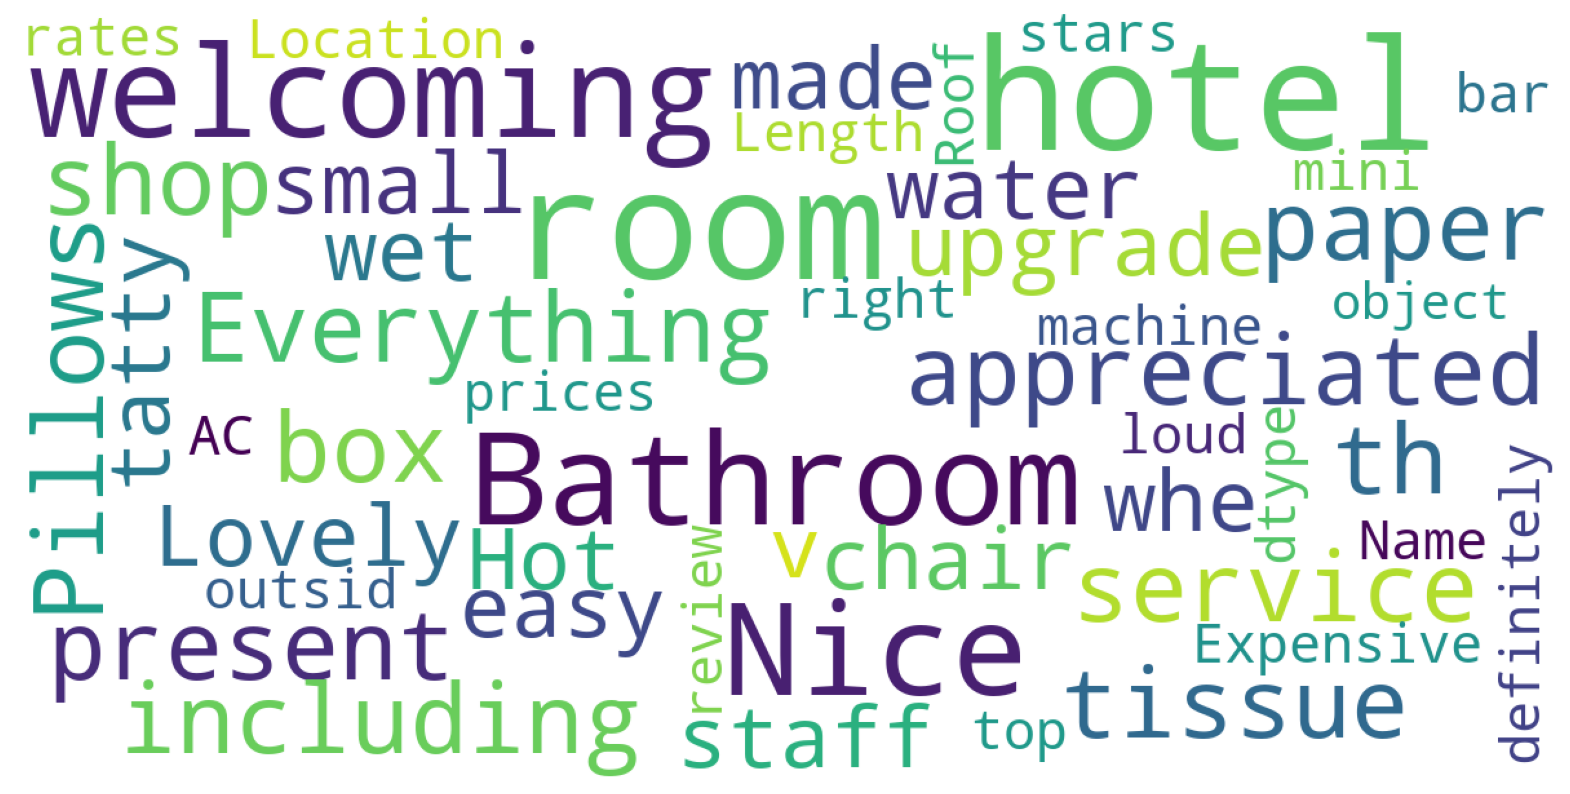

In [28]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review"])

In [29]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
43101,A perfect location comfortable great value,0.931
211742,Clean comfortable lovely staff,0.907
175551,Friendly welcome Comfortable room,0.905
365085,Good location great value,0.904
109564,Clean friendly and comfortable,0.902
145743,Good value amazing location,0.901
407590,breakfast excellent Clean comfort,0.899
407546,Great place I enjoyed,0.881
218571,Beautiful Quirky Comfortable,0.878
436901,Lovely comfortable rooms,0.877


In [30]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
193086,No dislikes LOCATION,0.831
356368,Nothing Great helpful wonderful staff,0.812
318516,A disaster Nothing,0.804
458794,Nothing Excellent friendly helpful staff,0.799
29666,A bit noisy No,0.796
426057,Dirty hotel Smells bad,0.762
263187,Very bad service No,0.758
443796,Nothing perfect,0.750
181508,Window blind was broken,0.744
175316,Nothing Super friendly staff,0.743


C:\Users\Radhika\AppData\Local\Temp\ipykernel_20704\1439915955.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)
C:\Users\Radhika\AppData\Local\Temp\ipykernel_20704\1439915955.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

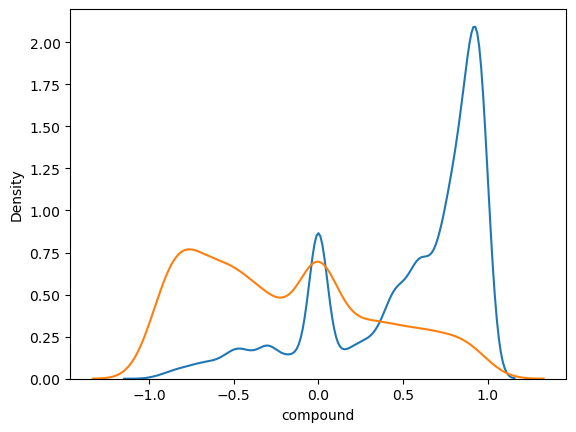

In [31]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

Modelling is_bad_review :

In [32]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

In [33]:
features

['neg',
 'neu',
 'pos',
 'compound',
 'nb_chars',
 'nb_words',
 'doc2vec_vector_0',
 'doc2vec_vector_1',
 'doc2vec_vector_2',
 'doc2vec_vector_3',
 'doc2vec_vector_4',
 'word_abbey',
 'word_ability',
 'word_abit',
 'word_able',
 'word_abroad',
 'word_abrupt',
 'word_absence',
 'word_absolute',
 'word_absolutely',
 'word_abundant',
 'word_ac',
 'word_accept',
 'word_acceptable',
 'word_acces',
 'word_access',
 'word_accessibility',
 'word_accessible',
 'word_accessory',
 'word_accident',
 'word_accidentally',
 'word_accommodate',
 'word_accommodating',
 'word_accommodation',
 'word_accomodate',
 'word_accomodating',
 'word_accomodation',
 'word_accompany',
 'word_accord',
 'word_accordingly',
 'word_account',
 'word_accurate',
 'word_accuse',
 'word_ace',
 'word_ache',
 'word_acknowledge',
 'word_acoustic',
 'word_across',
 'word_act',
 'word_action',
 'word_activate',
 'word_active',
 'word_activity',
 'word_actual',
 'word_actually',
 'word_ad',
 'word_adapter',
 'word_adaptor',
 'wor

In [34]:
# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)


In [35]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.037583
2,pos,0.024548
6,doc2vec_vector_0,0.023040
0,neg,0.022027
10,doc2vec_vector_4,0.019615
8,doc2vec_vector_2,0.017182
4,nb_chars,0.016972
9,doc2vec_vector_3,0.016608
7,doc2vec_vector_1,0.016598
1,neu,0.014900


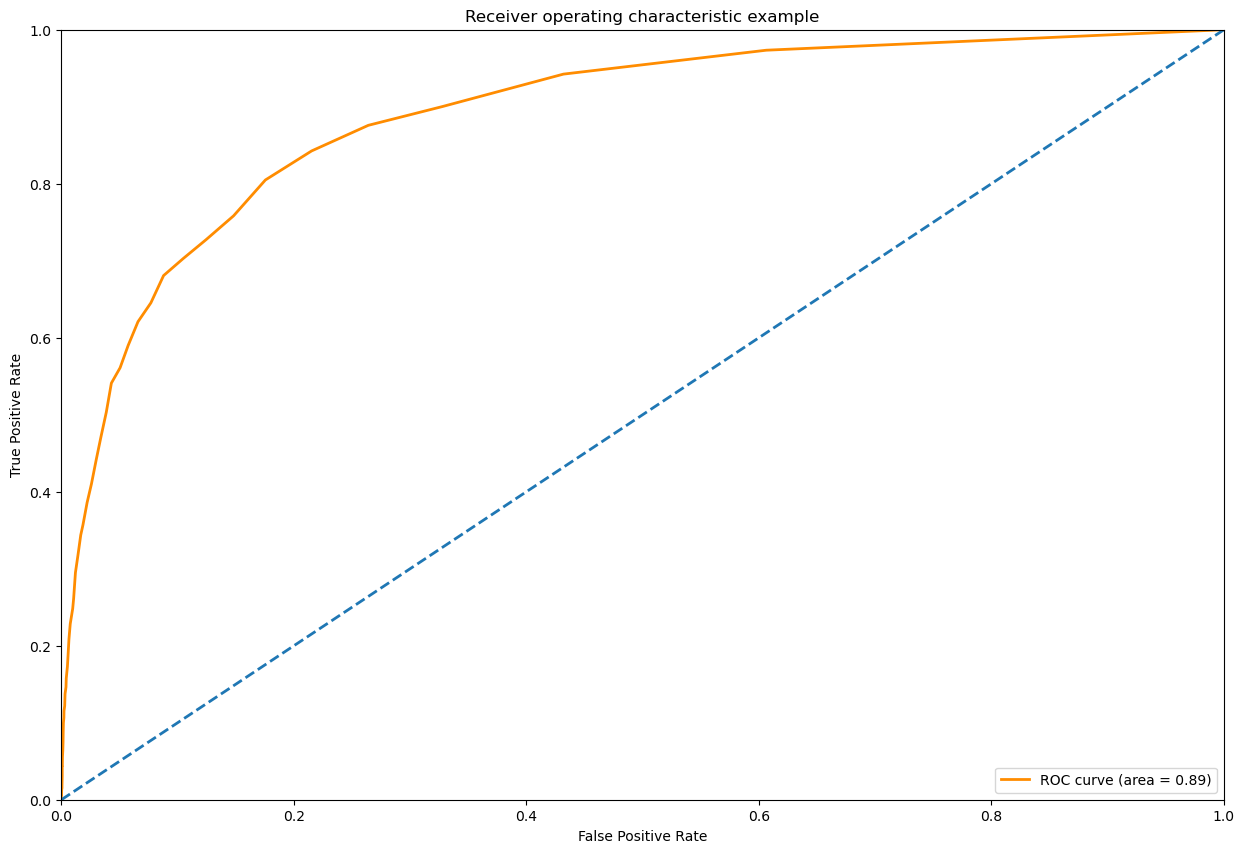

In [36]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()